In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 97% 1.04G/1.06G [00:05<00:00, 211MB/s]
100% 1.06G/1.06G [00:05<00:00, 200MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# Generators
train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize
def process (image,label):
  image = tf.cast(image/255,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create CNN Model

model = Sequential()
#Layer1
model.add(Conv2D(32,kernel_size=(3,3),
                 padding='valid',
                 activation='relu',
                 input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2,
                       padding='valid'))
model.add(BatchNormalization())
#Layer2
model.add(Conv2D(64,kernel_size=(3,3),
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2,
                       padding='valid'))
model.add(BatchNormalization())
#Layer3
model.add(Conv2D(128,kernel_size=(3,3),
                 padding='valid',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2,
                       padding='valid'))
#Flatten Layer
model.add(Flatten())

# DropOut Here
model.add(Dropout(0.5))

#Dense Layer also called fully connected Layer
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 127, 127, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                        

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer= opt,loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
model1 = model.fit(train_ds,epochs=20,validation_data=validation_ds)

Epoch 1/20
625/625 [==============================] - 3045s 5s/step - loss: 0.6286 - accuracy: 0.6789 - val_loss: 0.5580 - val_accuracy: 0.7176
Epoch 2/20
111/625 [====>.........................] - ETA: 39:49 - loss: 0.4996 - accuracy: 0.7610

In [ ]:
model2 = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 60s 94ms/step - loss: 0.6208 - accuracy: 0.6435 - val_loss: 0.5357 - val_accuracy: 0.7374
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.4854 - accuracy: 0.7644 - val_loss: 0.5043 - val_accuracy: 0.7598
Epoch 3/10
625/625 [==============================] - 59s 93ms/step - loss: 0.3867 - accuracy: 0.8218 - val_loss: 0.4828 - val_accuracy: 0.7926
Epoch 4/10
625/625 [==============================] - 59s 94ms/step - loss: 0.2703 - accuracy: 0.8842 - val_loss: 0.6173 - val_accuracy: 0.7978
Epoch 5/10
625/625 [==============================] - 59s 94ms/step - loss: 0.1838 - accuracy: 0.9283 - val_loss: 0.6764 - val_accuracy: 0.7846
Epoch 6/10
625/625 [==============================] - 59s 93ms/step - loss: 0.1272 - accuracy: 0.9521 - val_loss: 1.0269 - val_accuracy: 0.7644
Epoch 7/10
625/625 [==============================] - 59s 93ms/step - loss: 0.1068 - accuracy: 0.9630 - val_loss: 0.7683 - val_accuracy:

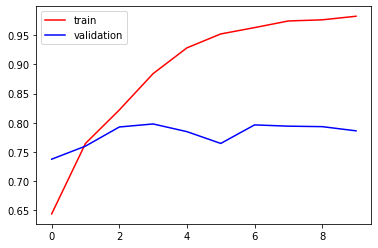

In [ ]:
# Previous Model

import matplotlib.pyplot as plt
plt.plot(model2.history['accuracy'],color='red',label='train')
plt.plot(model2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Current Model 

import matplotlib.pyplot as plt
plt.plot(model1.model1['accuracy'],color='red',label='train')
plt.plot(model1.model1['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

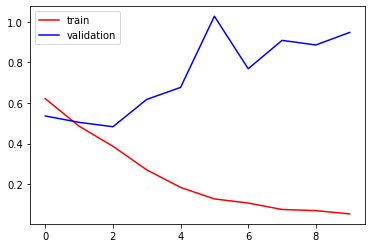

In [ ]:
# Previous Model
plt.plot(model2.history['loss'],color='red',label='train')
plt.plot(model2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Current Model
plt.plot(model1.model1['loss'],color='red',label='train')
plt.plot(model1.model1['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()